# Import libraries

In [1]:
import pandas as pd
import numpy as np
# importing required modules
from zipfile import ZipFile
#Extract text from PDF
# importing required modules 
import PyPDF2 
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Test
test = pd.read_csv('test_x.csv')

In [3]:
#Train 1 data CSV
train1 = pd.read_csv('train1.csv')
#Train 2 data CSV
train2 = pd.read_csv('train2.csv', sep=";")

In [4]:
#Data shape CSV
print('shape train1', train1.shape)
print('shape train2', train2.shape)

shape train1 (18563, 21)
shape train2 (18564, 21)


In [5]:
#Columns from train2
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18564 entries, 0 to 18563
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   countryName                   18564 non-null  object 
 1   eprtrSectorName               18564 non-null  object 
 2   EPRTRAnnexIMainActivityLabel  18564 non-null  object 
 3   FacilityInspireID             18564 non-null  object 
 4   facilityName                  18564 non-null  object 
 5   City                          18564 non-null  object 
 6   targetRelease                 18564 non-null  object 
 7   pollutant                     18564 non-null  object 
 8   reportingYear                 18564 non-null  int64  
 9   MONTH                         18564 non-null  int64  
 10  DAY                           18564 non-null  int64  
 11  CONTINENT                     18564 non-null  object 
 12  max_wind_speed                18564 non-null  float64
 13  a

In [6]:
#Train 3 data JSON
train3 = pd.read_json('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first')
train4 = pd.read_json('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second')
train5 = pd.read_json('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third')

In [7]:
#Shape from JSON
print('shape train3', train3.shape)
print('shape train4', train4.shape)
print('shape train5', train5.shape)

shape train3 (9500, 24)
shape train4 (9500, 24)
shape train5 (9501, 24)


# Data from Zip

In [8]:
#Train 6 zip specifying the zip file name
file_name = "train6.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
      
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()

    print('Done!')

File Name                                             Modified             Size
train6/                                        2022-05-19 00:52:32            0
train6/pdfs81536.pdf                           2022-05-18 02:47:02       106951
train6/pdfs81522.pdf                           2022-05-18 02:46:56       106890
train6/pdfs81523.pdf                           2022-05-18 02:46:56       107674
train6/pdfs81537.pdf                           2022-05-18 02:47:04       105297
train6/pdfs81521.pdf                           2022-05-18 02:46:56       106419
train6/pdfs81535.pdf                           2022-05-18 02:47:02       104615
train6/pdfs81534.pdf                           2022-05-18 02:47:02       107397
train6/pdfs81520.pdf                           2022-05-18 02:46:54       105559
train6/pdfs81518.pdf                           2022-05-18 02:46:54       106918
train6/pdfs81524.pdf                           2022-05-18 02:46:56       106575
train6/pdfs81530.pdf                    

In [9]:
from PyPDF2 import PdfFileMerger

pdfs = ['train6/pdfs81596.pdf', 'train6/pdfs81593.pdf', 'train6/pdfs81594.pdf', 'train6/pdfs81595.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("result.pdf")
merger.close()

# Extract text from PDF

In [10]:
# creating a pdf file object 
pdfFileObj = open('train6/pdfs-1.pdf', 'rb') 
    
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
# printing number of pages in pdf file 
print(pdfReader.numPages) 
    
# creating a page object 
pageObj = pdfReader.getPage(0) 
    
# extracting text from page 
print(pageObj.extractText()) 
    
# closing the pdf file object 
pdfFileObj.close()

1
RE PORT  C ONT AMI N AC I ÓN
nº:
81597
FAC I LI T Y N AME:
M illerhill Re cy cling &  E nergy Rec o v ery  Ce ntre
Fac i l i ty I ns pi r eI D:
UK.SEP A/2 0 0 0 0 2 6 5 1 .Facility
C OUNT RY :
United Kingdo m
C ONT I N EN T :
EUROP E
C I T Y:
M illerhill, D alkeith
EPR T RSec tor C ode:
5
epr tr Sec tor N ame:
Waste  and w aste wat er m anagem ent
Mai nAc ti v i ty C ode:
5 (b)
tar g etR eal as e:
AIR
pol l utant:
Nitro gen o xides (NOX )
emi s s i ons :
175000
DA Y:
12
MONT H:
6
YEA R:
2019
MET EOROLOGI C AL  C ONDI T I ONS
max_w i nd_s peed:
1 ,7 9 E+ 1 5
mi n_w i nd_s peed:
2 ,2 E+ 1 6
av g _w i nd_s peed:
2 ,0 4 E+ 1 5
max_temp:
1 ,5 1 E+ 1 6
mi n_temp:
1 ,8 2 E+ 1 5
av g _temp:
1 ,7 1 E+ 1 6
DA YS FOG:
10
RE PORT ER  N AME:
William Nelso n
C I T Y_ I D
c6 6 2 b4 b4 d8 5 9 a9 c2 2 4 b5 ac0 acf2 2 1 7 4 8



In [11]:
json1 = pageObj.extractText()
json1

'RE PORT  C ONT AMI N AC I ÓN\nnº:\n81597\nFAC I LI T Y N AME:\nM illerhill Re cy cling &  E nergy Rec o v ery  Ce ntre\nFac i l i ty I ns pi r eI D:\nUK.SEP A/2 0 0 0 0 2 6 5 1 .Facility\nC OUNT RY :\nUnited Kingdo m\nC ONT I N EN T :\nEUROP E\nC I T Y:\nM illerhill, D alkeith\nEPR T RSec tor C ode:\n5\nepr tr Sec tor N ame:\nWaste  and w aste wat er m anagem ent\nMai nAc ti v i ty C ode:\n5 (b)\ntar g etR eal as e:\nAIR\npol l utant:\nNitro gen o xides (NOX )\nemi s s i ons :\n175000\nDA Y:\n12\nMONT H:\n6\nYEA R:\n2019\nMET EOROLOGI C AL  C ONDI T I ONS\nmax_w i nd_s peed:\n1 ,7 9 E+ 1 5\nmi n_w i nd_s peed:\n2 ,2 E+ 1 6\nav g _w i nd_s peed:\n2 ,0 4 E+ 1 5\nmax_temp:\n1 ,5 1 E+ 1 6\nmi n_temp:\n1 ,8 2 E+ 1 5\nav g _temp:\n1 ,7 1 E+ 1 6\nDA YS FOG:\n10\nRE PORT ER  N AME:\nWilliam Nelso n\nC I T Y_ I D\nc6 6 2 b4 b4 d8 5 9 a9 c2 2 4 b5 ac0 acf2 2 1 7 4 8\n'

In [12]:
json1 = json1.replace("\n", ",")
json1 = json1.replace(":", ",")
json1 = json1.replace(" ", "")
json1 = json1.replace("REPORTCONTAMINACIÓN,", "")
json1 = json1.replace(",,", ",")

In [13]:
json1

'nº,81597,FACILITYNAME,MillerhillRecycling&EnergyRecoveryCentre,FacilityInspireID,UK.SEPA/200002651.Facility,COUNTRY,UnitedKingdom,CONTINENT,EUROPE,CITY,Millerhill,Dalkeith,EPRTRSectorCode,5,eprtrSectorName,Wasteandwastewatermanagement,MainActivityCode,5(b),targetRealase,AIR,pollutant,Nitrogenoxides(NOX),emissions,175000,DAY,12,MONTH,6,YEAR,2019,METEOROLOGICALCONDITIONS,max_wind_speed,1,79E+15,min_wind_speed,2,2E+16,avg_wind_speed,2,04E+15,max_temp,1,51E+16,min_temp,1,82E+15,avg_temp,1,71E+16,DAYSFOG,10,REPORTERNAME,WilliamNelson,CITY_ID,c662b4b4d859a9c224b5ac0acf221748,'

In [14]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

TESTDATA = StringIO(json1)
df = pd.read_csv(TESTDATA, sep=",")

# Work only with data CSV, JSON
 Concat all datasets (CSV, JSON) for train dataset

In [15]:
train_csv = pd.concat([train1, train2])
train_csv

countryName                           eprtrSectorName  \
0             Germany                          Mineral industry   
1               Italy                          Mineral industry   
2               Spain           Waste and wastewater management   
3             Czechia                             Energy sector   
4             Finland           Waste and wastewater management   
...               ...                                       ...   
18559  United Kingdom  Paper and wood production and processing   
18560         Czechia                             Energy sector   
18561     Netherlands                         Chemical industry   
18562         Germany                          Mineral industry   
18563           Italy                          Mineral industry   

                            EPRTRAnnexIMainActivityLabel  \
0      Installations for the production of cement cli...   
1      Installations for the production of cement cli...   
2      Landfills (excluding landfills of inert waste ...   
3      Thermal power stations and other combustion in...   
4                     Urban waste-water treatment plants   
...                                                  ...   
18559  Industrial plants for the production of paper ...   
18560  Thermal power stations and other combustion in...   
18561  Chemical installations for the production on a...   
18562  Installations for the manufacture of glass, in...   
18563  Installations for the production of cement cli...   

                                       FacilityInspireID  \
0      https://registry.gdi-de.org/id/de.ni.mu/062217...   
1                             IT.CAED/240602021.FACILITY   
2                             ES.CAED/001966000.FACILITY   
3                        CZ.MZP.U422/CZ34736841.FACILITY   
4      http://paikkatiedot.fi/so/1002031/pf/Productio...   
...                                                  ...   
18559                         UK.SEPA/200000218.Facility   
18560                    CZ.MZP.U427/CZ34594641.FACILITY   
18561                               NL.EEA/6322.FACILITY   
18562  https://registry.gdi-de.org/id/de.ni.mu/072362...   
18563                         IT.CAED/520162001.FACILITY   

                                            facilityName  \
0                   Holcim (Deutschland) GmbH Werk Höver   
1                   Stabilimento di Tavernola Bergamasca   
2                      COMPLEJO MEDIOAMBIENTAL DE ZURITA   
3                                    Elektrárny Prunéřov   
4      TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...   
...                                                  ...   
18559                     Egger (UK) Ltd, Barony Rd, Ayr   
18560                                    Teplárna Trmice   
18561                 Air Products Nederland BV (Pernis)   
18562                Ardagh Glass GmbH Werk Obernkirchen   
18563             COLACEM S.P.A. - CEMENTERIA DI RASSINA   

                             City targetRelease              pollutant  \
0                          Sehnde           AIR   Carbon dioxide (CO2)   
1            TAVERNOLA BERGAMASCA           AIR  Nitrogen oxides (NOX)   
2              PUERTO DEL ROSARIO           AIR          Methane (CH4)   
3                           Kadaň           AIR  Nitrogen oxides (NOX)   
4                         Tampere           AIR          Methane (CH4)   
...                           ...           ...                    ...   
18559                     Cumnock           AIR  Nitrogen oxides (NOX)   
18560                      Trmice           AIR   Carbon dioxide (CO2)   
18561  Vondelingenplaat Rotterdam           AIR  Nitrogen oxides (NOX)   
18562                Obernkirchen           AIR   Carbon dioxide (CO2)   
18563            CASTEL FOCOGNANO           AIR  Nitrogen oxides (NOX)   

       reportingYear  MONTH  ...  CONTINENT max_wind_speed  avg_wind_speed  \
0               2015     10  ...     EUROPE      15.118767       14.312541 

In [16]:
#Concat data JSON
train_json = pd.concat([train3, train4, train5])
train_json

CITY ID CONTINENT                 City  \
0     47068  4c325d62c064477ef17b4c6e4437e121    EUROPE  Europoort Rotterdam   
1     32952  f5e609e7095f91cc8ce9ed6d8e774a0d    EUROPE                 RION   
2     72375  cfab1ba8c67c7c838db98d666f02a132    EUROPE                   --   
3     40702  95b4e51f7b662598134e1eb956407c74    EUROPE             DRIZZONA   
4     29884  f4433be3b1bfaeeb0633eb65d04b1325    EUROPE                Lünen   
...     ...                               ...       ...                  ...   
9496   5147  2d4776365b33d5f1be53ea4606e2c79c    EUROPE              LARNAKA   
9497   9442  020b11bf06b96aae1dd910a56674a8aa    EUROPE             Naantali   
9498  57189  84afdc8367dfd9124e8b8f994e986fe9    EUROPE                 Ptuj   
9499  40953  09ad69bcf41256f40be3314a33e0438c    EUROPE             VIGGIANO   
9500  71260  b5f44c55c14c881ea21499a32fc972d0    EUROPE              Runcorn   

      DAY  DAY WITH FOGS EPRTRAnnexIMainActivityCode  \
0       2              1                        4(a)   
1       3              2                        3(c)   
2       1             12                        1(c)   
3      17              1                        7(a)   
4       6              0                        5(a)   
...   ...            ...                         ...   
9496    1              0                        1(c)   
9497   19              0                        1(c)   
9498   10              2                        5(d)   
9499   25              0                        3(a)   
9500   23             13                        1(c)   

                           EPRTRAnnexIMainActivityLabel  EPRTRSectorCode  \
0     Chemical installations for the production on a...                4   
1     Installations for the production of cement cli...                3   
2     Thermal power stations and other combustion in...                1   
3     Installations for the intensive rearing of pou...                7   
4     Installations for the recovery or disposal of ...                5   
...                                                 ...              ...   
9496  Thermal power stations and other combustion in...                1   
9497  Thermal power stations and other combustion in...                1   
9498  Landfills (excluding landfills of inert waste ...                5   
9499          Underground mining and related operations                3   
9500  Thermal power stations and other combustion in...                1   

                                      FacilityInspireID  ...     countryName  \
0                            NL.RIVM/000019070.FACILITY  ...     Netherlands   
1                               EL.CAED/100075.FACILITY  ...          Greece   
2            UK.CAED/BEISOffsh-Cormorant-Alpha.FACILITY  ...  United Kingdom   
3                            IT.CAED/260342003.FACILITY  ...           Italy   
4     https://registry.gdi-de.org/id/de.nw.inspire.p...  ...         Germany   
...                                                 ...  ...             ...   
9496                        CY.CAED/0030030000.FACILITY  ...          Cyprus   
9497  http://paikkatiedot.fi/so/1002031/pf/Productio...  ...         Finland   
9498                         SI.ARSO/000000037.FACILITY  ...        Slovenia   
9499                         IT.CAED/850592002.FACILITY  ...           Italy   
9500                              GB.EEA/13394.FACILITY  ...  United Kingdom   

                                     eprtrSectorName  \
0                                  Chemical industry   
1                                   Mineral industry   
2                                      Energy sector   
3     Intensive livestock production and aquaculture   
4                    Waste and wastewater management   
...                                              ...   
9496                                   Energy sector   
9497                                   Energy sector   
9498                 Waste

In [17]:
train_data = train_json.merge(train_csv, how='outer')
train_data

CITY ID CONTINENT  \
0      47068.0  4c325d62c064477ef17b4c6e4437e121    EUROPE   
1      32952.0  f5e609e7095f91cc8ce9ed6d8e774a0d    EUROPE   
2      72375.0  cfab1ba8c67c7c838db98d666f02a132    EUROPE   
3      40702.0  95b4e51f7b662598134e1eb956407c74    EUROPE   
4      29884.0  f4433be3b1bfaeeb0633eb65d04b1325    EUROPE   
...        ...                               ...       ...   
65623      NaN  904e477eca5ddd3de5f7021c2bd7dea8    EUROPE   
65624      NaN  9b120a36e064e9706688467e57a02bc9    EUROPE   
65625      NaN  bbd93b1785138d97c8dabe0cf482c855    EUROPE   
65626      NaN  466a278c504e15653e8b504c0047126a    EUROPE   
65627      NaN  51ab546028b011feaf7cdf73e84af9f8    EUROPE   

                        City  DAY  DAY WITH FOGS EPRTRAnnexIMainActivityCode  \
0        Europoort Rotterdam    2              1                        4(a)   
1                       RION    3              2                        3(c)   
2                         --    1             12                        1(c)   
3                   DRIZZONA   17              1                        7(a)   
4                      Lünen    6              0                        5(a)   
...                      ...  ...            ...                         ...   
65623                 TERTRE   18              0                         NaN   
65624  CARRIERES SOUS POISSY   27              1                         NaN   
65625                Legnica   12              1                         NaN   
65626          Kassel, Stadt   23              2                         NaN   
65627                LLOSETA    5              2                         NaN   

                            EPRTRAnnexIMainActivityLabel  EPRTRSectorCode  \
0      Chemical installations for the production on a...              4.0   
1      Installations for the production of cement cli...              3.0   
2      Thermal power stations and other combustion in...              1.0   
3      Installations for the intensive rearing of pou...              7.0   
4      Installations for the recovery or disposal of ...              5.0   
...                                                  ...              ...   
65623  Chemical installations for the production on a...              NaN   
65624  Installations for the incineration of non-haza...              NaN   
65625  Landfills (excluding landfills of inert waste ...              NaN   
65626  Thermal power stations and other combustion in...              NaN   
65627  Installations for the production of cement cli...              NaN   

                                       FacilityInspireID  ...     countryName  \
0                             NL.RIVM/000019070.FACILITY  ...     Netherlands   
1                                EL.CAED/100075.FACILITY  ...          Greece   
2             UK.CAED/BEISOffsh-Cormorant-Alpha.FACILITY  ...  United Kingdom   
3                             IT.CAED/260342003.FACILITY  ...           Italy   
4      https://registry.gdi-de.org/id/de.nw.inspire.p...  ...         Germany   
...                                                  ...  ...             ...   
65623                           BE.WA/053010000.FACILITY  ...         Belgium   
65624                              FR.CAED/8261.FACILITY  ...          France   
65625                           PL.MŚ/000000278.FACILITY  ...          Poland   
65626  https://registry.gdi-de.org/id/de.he.0945.de7....  ...         Germany   
65627                         ES.CAED/002584000.FACILITY  ...           Spain   

                                      eprtrSectorName  \
0                                   Chemical industry   
1                                    Mineral industry   
2                                       Energy sector   
3      Intensive livestock production and aquaculture   
4                     Waste and wastewater management   
...                                               ...   
65623                               Ch

# Codificar el tipo de contaminante
## contaminante	número:
pollutant	number

Nitrogen oxides (NOX)	0

Carbon dioxide (CO2)	1

Methane (CH4)	2



In [18]:
train_data.pollutant.unique()

array(['Carbon dioxide (CO2)', 'Nitrogen oxides (NOX)', 'Methane (CH4)'],
      dtype=object)

In [19]:
train_data['pollutant_type'] = np.nan

In [20]:
# Applying the condition
train_data.loc[train_data["pollutant"] == "Nitrogen oxides (NOX)", "pollutant_type"] = 0
train_data.loc[train_data["pollutant"] == "Carbon dioxide (CO2)", "pollutant_type"] = 1
train_data.loc[train_data["pollutant"] == "Methane (CH4)", "pollutant_type"] = 2

In [21]:
train_data.pollutant_type

0        1.0
1        0.0
2        0.0
3        2.0
4        1.0
        ... 
65623    1.0
65624    1.0
65625    1.0
65626    0.0
65627    1.0
Name: pollutant_type, Length: 65628, dtype: float64

In [22]:
train_data.describe()

DAY  DAY WITH FOGS  EPRTRSectorCode  \
count  28501.000000  65628.000000   65628.000000     28501.000000   
mean   40836.986457     14.517203       2.232568         3.168170   
std    23584.386942      8.097332       3.778429         2.041559   
min        0.000000      1.000000       0.000000         1.000000   
25%    20308.000000      8.000000       0.000000         1.000000   
50%    40768.000000     14.000000       1.000000         3.000000   
75%    61272.000000     22.000000       2.000000         5.000000   
max    81594.000000     28.000000      19.000000         9.000000   

              MONTH      avg_temp  avg_wind_speed      max_temp  \
count  65628.000000  65628.000000    65628.000000  65628.000000   
mean       6.489974     10.448142       18.015285      9.455406   
std        3.450833      5.084529        2.310739      5.216525   
min        1.000000     -0.199176       14.000100     -3.141464   
25%        3.000000      7.186013       16.012197      5.879821   
50%        7.000000     10.701504       18.020789      9.698967   
75%        9.000000     14.193578       20.011702     13.282417   
max       12.000000     19.999403       21.999973     20.938266   

       max_wind_speed      min_temp  min_wind_speed  reportingYear  \
count    65628.000000  65628.000000    65628.000000   65628.000000   
mean        15.515958     13.442827       22.521038    2012.935043   
std          3.067272      5.216068        3.059973       3.853655   
min          8.011958      0.894827       15.032589    2007.000000   
25%         13.324166      9.894281       20.346158    2010.000000   
50%         15.506820     13.692473       22.540387    2013.000000   
75%         17.718201     17.268000       24.715251    2016.000000   
max         22.991382     24.902108       29.933603    2020.000000   

       pollutant_type  
count    65628.000000  
mean         0.858292  
std          0.793736  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          2.000000  
max          2.000000

In [23]:
#Check the null data
train_data.isnull().sum(axis=0)

                                37127
CITY ID                             0
CONTINENT                           0
City                                0
DAY                                 0
DAY WITH FOGS                       0
EPRTRAnnexIMainActivityCode     37127
EPRTRAnnexIMainActivityLabel        0
EPRTRSectorCode                 37127
FacilityInspireID                   0
MONTH                               0
REPORTER NAME                       0
avg_temp                            0
avg_wind_speed                      0
countryName                         0
eprtrSectorName                     0
facilityName                        0
max_temp                            0
max_wind_speed                      0
min_temp                            0
min_wind_speed                      0
pollutant                           0
reportingYear                       0
targetRelease                       0
pollutant_type                      0
dtype: int64

In [24]:
#Remove columns with null values
train = train_data.dropna(axis=1)

# Categorical features

In [25]:
train_copy = train.copy()

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65628 entries, 0 to 65627
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CITY ID                       65628 non-null  object 
 1   CONTINENT                     65628 non-null  object 
 2   City                          65628 non-null  object 
 3   DAY                           65628 non-null  int64  
 4   DAY WITH FOGS                 65628 non-null  int64  
 5   EPRTRAnnexIMainActivityLabel  65628 non-null  object 
 6   FacilityInspireID             65628 non-null  object 
 7   MONTH                         65628 non-null  int64  
 8   REPORTER NAME                 65628 non-null  object 
 9   avg_temp                      65628 non-null  float64
 10  avg_wind_speed                65628 non-null  float64
 11  countryName                   65628 non-null  object 
 12  eprtrSectorName               65628 non-null  object 
 13  f

In [27]:
#Replace names with blank space
train.columns = train.columns.str.replace('REPORTER NAME', 'REPORTER_NAME')
train.columns = train.columns.str.replace('DAY WITH FOGS', 'DAY_WITH_FOGS')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65628 entries, 0 to 65627
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CITY ID                       65628 non-null  object 
 1   CONTINENT                     65628 non-null  object 
 2   City                          65628 non-null  object 
 3   DAY                           65628 non-null  int64  
 4   DAY_WITH_FOGS                 65628 non-null  int64  
 5   EPRTRAnnexIMainActivityLabel  65628 non-null  object 
 6   FacilityInspireID             65628 non-null  object 
 7   MONTH                         65628 non-null  int64  
 8   REPORTER_NAME                 65628 non-null  object 
 9   avg_temp                      65628 non-null  float64
 10  avg_wind_speed                65628 non-null  float64
 11  countryName                   65628 non-null  object 
 12  eprtrSectorName               65628 non-null  object 
 13  f

In [29]:
#Check unique data type in object type variables
print('len ID EPRTRA', len(train.EPRTRAnnexIMainActivityLabel.unique()))
print('len ID county name', len(train.countryName.unique()))
print('len ID sector name', len(train.eprtrSectorName.unique()))

print('len ID continent', len(train.CONTINENT.unique()))
print('len ID city', len(train.City.unique()))

print('len ID facility', len(train.FacilityInspireID.unique()))
print('len ID reporter', len(train.REPORTER_NAME.unique()))

len ID EPRTRA 71
len ID county name 32
len ID sector name 9
len ID continent 1
len ID city 5136
len ID facility 7185
len ID reporter 45016


In [30]:
#Remove the ID, irrelevant information 
del train['FacilityInspireID']
del train['REPORTER_NAME']

In [31]:
test['EPRTRAnnexIMainActivityLabel_code'] = test.EPRTRAnnexIMainActivityLabel.astype("category").cat.codes
test['countryName_code'] = test.countryName.astype("category").cat.codes
test['eprtrSectorName_code'] = test.eprtrSectorName.astype("category").cat.codes
test['CONTINENT_code'] = test.CONTINENT.astype("category").cat.codes
test['City_code'] = test.City.astype("category").cat.codes

In [32]:
categorical_train = train.copy()

In [33]:
train['EPRTRAnnexIMainActivityLabel_code'] = train.EPRTRAnnexIMainActivityLabel.astype("category").cat.codes
train['countryName_code'] = train.countryName.astype("category").cat.codes
train['eprtrSectorName_code'] = train.eprtrSectorName.astype("category").cat.codes
train['CONTINENT_code'] = train.CONTINENT.astype("category").cat.codes
train['City_code'] = train.City.astype("category").cat.codes

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [<ipython-input-33-5cbb9f0eceb1>:1]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [<ipython-input-33-5cbb9f0eceb1>:2]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [<ipython-input-33-5cbb9f0eceb1>:3]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [34]:
train.countryName_code

0        20
1        11
2        31
3        15
4        10
         ..
65623     1
65624     9
65625    22
65626    10
65627    28
Name: countryName_code, Length: 65628, dtype: int8

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65628 entries, 0 to 65627
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CITY ID                            65628 non-null  object 
 1   CONTINENT                          65628 non-null  object 
 2   City                               65628 non-null  object 
 3   DAY                                65628 non-null  int64  
 4   DAY_WITH_FOGS                      65628 non-null  int64  
 5   EPRTRAnnexIMainActivityLabel       65628 non-null  object 
 6   MONTH                              65628 non-null  int64  
 7   avg_temp                           65628 non-null  float64
 8   avg_wind_speed                     65628 non-null  float64
 9   countryName                        65628 non-null  object 
 10  eprtrSectorName                    65628 non-null  object 
 11  facilityName                       65628 non-null  obj

In [36]:
train = train.select_dtypes(exclude=[object])
train

DAY  DAY_WITH_FOGS  MONTH   avg_temp  avg_wind_speed   max_temp  \
0        2              1      3  12.326234       15.686450  13.256816   
1        3              2      2   5.114688       18.396180   4.528859   
2        1             12      9  10.208837       21.856210  10.669133   
3       17              1     10   9.502302       19.195731   7.095682   
4        6              0      9  11.585550       18.277089   9.886774   
...    ...            ...    ...        ...             ...        ...   
65623   18              0      4   9.579535       19.631538   7.758962   
65624   27              1      1   1.585879       16.122961  -0.616112   
65625   12              1      4  11.084730       19.087465   8.453532   
65626   23              2      2  10.224208       20.849406   9.159208   
65627    5              2      9  14.978706       16.322917  12.727891   

       max_wind_speed   min_temp  min_wind_speed  reportingYear  \
0           11.019329  14.696895       20.899762           2020   
1           14.512395   9.219003       23.243403           2019   
2           20.262171  14.715465       23.956529           2009   
3           18.283547  13.582024       26.696266           2014   
4           13.759408  14.006226       24.768933           2015   
...               ...        ...             ...            ...   
65623       17.174741  10.676554       22.429135           2014   
65624       13.426036   3.509897       23.657378           2019   
65625       19.201851  14.080898       23.323672           2009   
65626       20.812939  11.902442       22.724597           2017   
65627       11.128813  19.716273       23.203050           2015   

       pollutant_type  EPRTRAnnexIMainActivityLabel_code  countryName_code  \
0                 1.0                                  6                20   
1                 0.0                                 50                11   
2                 0.0                                 64                31   
3                 2.0                                 38                15   
4                 1.0                                 55                10   
...               ...                                ...               ...   
65623             1.0                                 19                 1   
65624             1.0                                 35                 9   
65625             1.0                                 58                22   
65626             0.0                                 64                10   
65627             1.0                                 49                28   

       eprtrSectorName_code  CONTINENT_code  City_code  
0                         1               0       1421  
1                         4               0       3551  
2                         2               0          8  
3                         3               0       1159  
4                         8               0       2578  
...                     ...             ...        ...  
65623                     1               0       4372  
65624                     8               0        756  
65625                     8               0       2475  
65626                     2               0       2147  
65627                     4               0       2395  

[65628 rows x 16 columns]

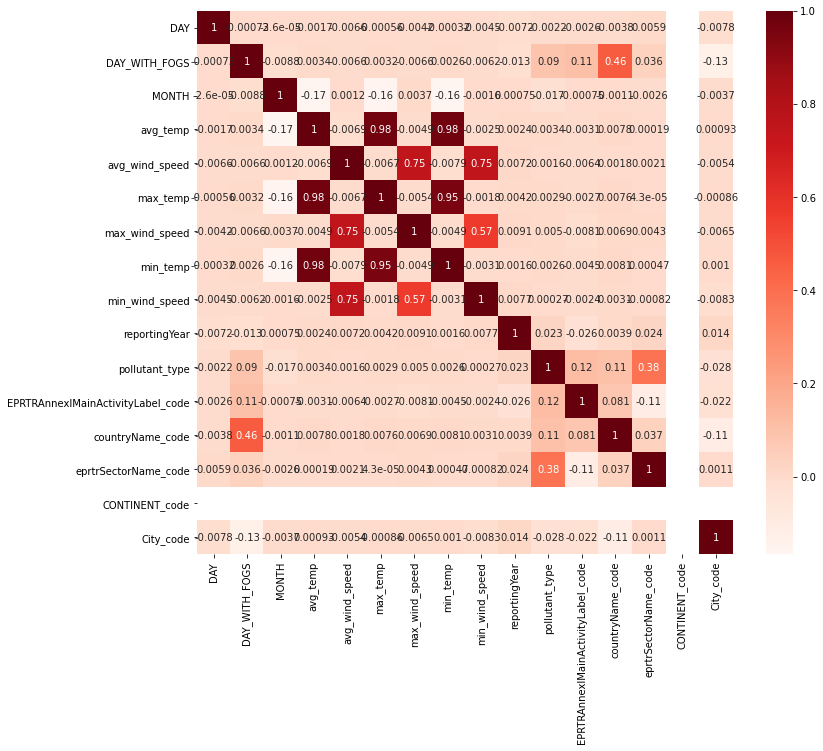

In [37]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(train["pollutant_type"])

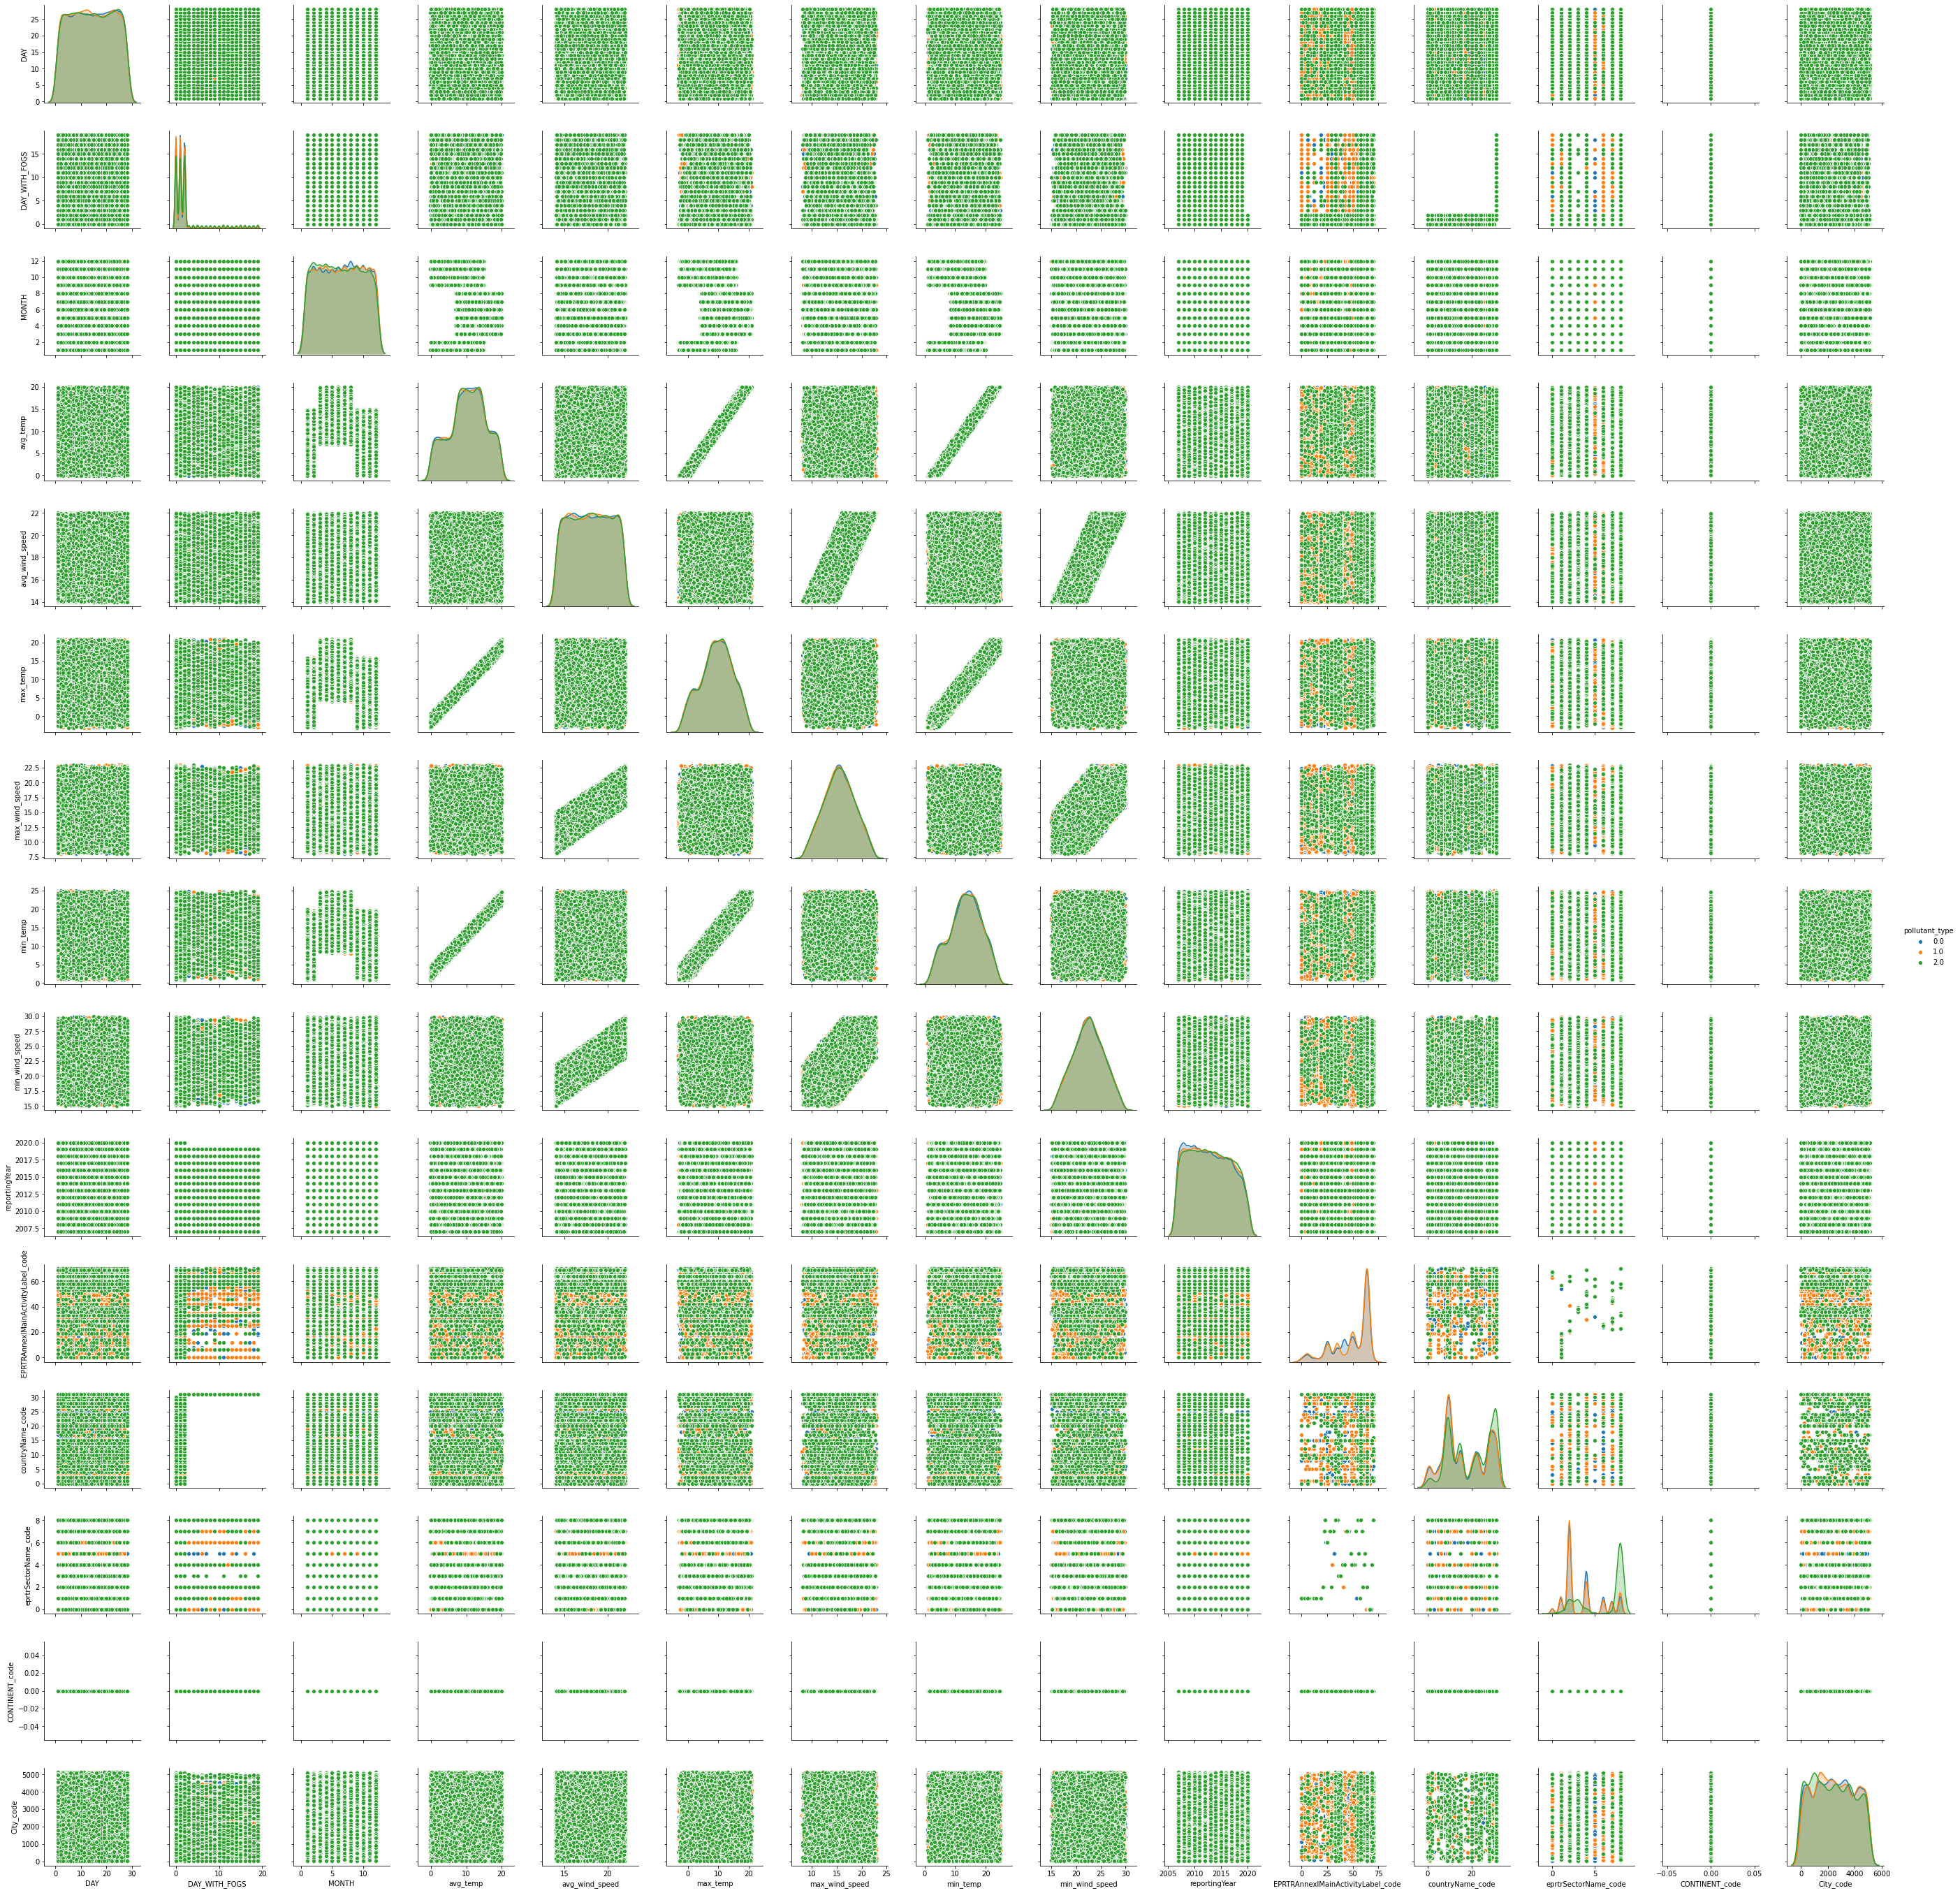

In [38]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(train.dropna(), hue='pollutant_type');

In [39]:
#Loading the dataset
X_train = train.drop("pollutant_type",1)   #Feature Matrix
y_train = train['pollutant_type'].values   #Target Variable
train.head()

DAY  DAY_WITH_FOGS  MONTH   avg_temp  avg_wind_speed   max_temp  \
0    2              1      3  12.326234       15.686450  13.256816   
1    3              2      2   5.114688       18.396180   4.528859   
2    1             12      9  10.208837       21.856210  10.669133   
3   17              1     10   9.502302       19.195731   7.095682   
4    6              0      9  11.585550       18.277089   9.886774   

   max_wind_speed   min_temp  min_wind_speed  reportingYear  pollutant_type  \
0       11.019329  14.696895       20.899762           2020             1.0   
1       14.512395   9.219003       23.243403           2019             0.0   
2       20.262171  14.715465       23.956529           2009             0.0   
3       18.283547  13.582024       26.696266           2014             2.0   
4       13.759408  14.006226       24.768933           2015             1.0   

   EPRTRAnnexIMainActivityLabel_code  countryName_code  eprtrSectorName_code  \
0                                  6                20                     1   
1                                 50                11                     4   
2                                 64                31                     2   
3                                 38                15                     3   
4                                 55                10                     8   

   CONTINENT_code  City_code  
0               0       1421  
1               0       3551  
2               0          8  
3               0       1159  
4               0       2578

In [40]:
train_cols = train.columns.to_list()
train_cols

['DAY',
 'DAY_WITH_FOGS',
 'MONTH',
 'avg_temp',
 'avg_wind_speed',
 'max_temp',
 'max_wind_speed',
 'min_temp',
 'min_wind_speed',
 'reportingYear',
 'pollutant_type',
 'EPRTRAnnexIMainActivityLabel_code',
 'countryName_code',
 'eprtrSectorName_code',
 'CONTINENT_code',
 'City_code']

In [41]:
test_data = test[test.columns.intersection(train_cols)]
test_data

reportingYear  MONTH  DAY  max_wind_speed  avg_wind_speed  \
0               2017      8   16       14.080054       14.855940   
1               2008     11   22       16.052425       17.623877   
2               2014      9   19       13.647318       15.541979   
3               2011      7   17       16.336762       17.458113   
4               2010      6   23       21.516602       20.532473   
...              ...    ...  ...             ...             ...   
24475           2014     11   16       11.243493       16.527223   
24476           2007     12   13       14.645536       17.044528   
24477           2019     12   12       16.789255       18.595172   
24478           2013      3   24       14.899569       17.112356   
24479           2012     11   19       17.317692       21.673556   

       min_wind_speed   max_temp   avg_temp   min_temp  \
0           18.474836  10.278561  11.381181  13.480752   
1           22.622900   6.625910   8.840137  13.422924   
2           17.818521   5.669436   8.403322  11.276388   
3           19.961777   6.160560   7.571596   9.443572   
4           21.617137  10.964012  11.548033  12.624114   
...               ...        ...        ...        ...   
24475       18.114884   3.194254   3.901992   6.437241   
24476       24.602476   9.358224   8.708120  13.258552   
24477       24.997173  12.047347  14.686131  17.699271   
24478       19.236777  14.977559  17.846682  20.892999   
24479       28.413668  13.088195  14.140447  17.847991   

       EPRTRAnnexIMainActivityLabel_code  countryName_code  \
0                                     68                22   
1                                     57                18   
2                                     63                20   
3                                     57                29   
4                                     63                23   
...                                  ...               ...   
24475                                 63                 0   
24476                                 63                28   
24477                                 57                 8   
24478                                  0                20   
24479                                 57                31   

       eprtrSectorName_code  CONTINENT_code  City_code  
0                         4               0       3160  
1                         8               0       1020  
2                         2               0       1143  
3                         8               0        369  
4                         2               0       3338  
...                     ...             ...        ...  
24475                     2               0       2106  
24476                     2               0        635  
24477                     8               0       1892  
24478                     1               0       1271  
24479                     8               0       4260  

[24480 rows x 14 columns]

In [42]:
#Test 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24480 entries, 0 to 24479
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   reportingYear                      24480 non-null  int64  
 1   MONTH                              24480 non-null  int64  
 2   DAY                                24480 non-null  int64  
 3   max_wind_speed                     24480 non-null  float64
 4   avg_wind_speed                     24480 non-null  float64
 5   min_wind_speed                     24480 non-null  float64
 6   max_temp                           24480 non-null  float64
 7   avg_temp                           24480 non-null  float64
 8   min_temp                           24480 non-null  float64
 9   EPRTRAnnexIMainActivityLabel_code  24480 non-null  int8   
 10  countryName_code                   24480 non-null  int8   
 11  eprtrSectorName_code               24480 non-null  int

In [43]:
X_train = X_train.to_numpy()
X_train

array([[2.000e+00, 1.000e+00, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        1.421e+03],
       [3.000e+00, 2.000e+00, 2.000e+00, ..., 4.000e+00, 0.000e+00,
        3.551e+03],
       [1.000e+00, 1.200e+01, 9.000e+00, ..., 2.000e+00, 0.000e+00,
        8.000e+00],
       ...,
       [1.200e+01, 1.000e+00, 4.000e+00, ..., 8.000e+00, 0.000e+00,
        2.475e+03],
       [2.300e+01, 2.000e+00, 2.000e+00, ..., 2.000e+00, 0.000e+00,
        2.147e+03],
       [5.000e+00, 2.000e+00, 9.000e+00, ..., 4.000e+00, 0.000e+00,
        2.395e+03]])

In [44]:
print('Train columns', len(train.columns.to_list()))
print('Test columns', len(test.columns.to_list()))

Train columns 16
Test columns 28


In [45]:
test = test_data.select_dtypes(exclude=[object])
test

reportingYear  MONTH  DAY  max_wind_speed  avg_wind_speed  \
0               2017      8   16       14.080054       14.855940   
1               2008     11   22       16.052425       17.623877   
2               2014      9   19       13.647318       15.541979   
3               2011      7   17       16.336762       17.458113   
4               2010      6   23       21.516602       20.532473   
...              ...    ...  ...             ...             ...   
24475           2014     11   16       11.243493       16.527223   
24476           2007     12   13       14.645536       17.044528   
24477           2019     12   12       16.789255       18.595172   
24478           2013      3   24       14.899569       17.112356   
24479           2012     11   19       17.317692       21.673556   

       min_wind_speed   max_temp   avg_temp   min_temp  \
0           18.474836  10.278561  11.381181  13.480752   
1           22.622900   6.625910   8.840137  13.422924   
2           17.818521   5.669436   8.403322  11.276388   
3           19.961777   6.160560   7.571596   9.443572   
4           21.617137  10.964012  11.548033  12.624114   
...               ...        ...        ...        ...   
24475       18.114884   3.194254   3.901992   6.437241   
24476       24.602476   9.358224   8.708120  13.258552   
24477       24.997173  12.047347  14.686131  17.699271   
24478       19.236777  14.977559  17.846682  20.892999   
24479       28.413668  13.088195  14.140447  17.847991   

       EPRTRAnnexIMainActivityLabel_code  countryName_code  \
0                                     68                22   
1                                     57                18   
2                                     63                20   
3                                     57                29   
4                                     63                23   
...                                  ...               ...   
24475                                 63                 0   
24476                                 63                28   
24477                                 57                 8   
24478                                  0                20   
24479                                 57                31   

       eprtrSectorName_code  CONTINENT_code  City_code  
0                         4               0       3160  
1                         8               0       1020  
2                         2               0       1143  
3                         8               0        369  
4                         2               0       3338  
...                     ...             ...        ...  
24475                     2               0       2106  
24476                     2               0        635  
24477                     8               0       1892  
24478                     1               0       1271  
24479                     8               0       4260  

[24480 rows x 14 columns]

In [46]:
test['pollutant_type'] = 0

In [47]:
#Array X test
X_test = test.to_numpy()
X_test

array([[2.017e+03, 8.000e+00, 1.600e+01, ..., 0.000e+00, 3.160e+03,
        0.000e+00],
       [2.008e+03, 1.100e+01, 2.200e+01, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [2.014e+03, 9.000e+00, 1.900e+01, ..., 0.000e+00, 1.143e+03,
        0.000e+00],
       ...,
       [2.019e+03, 1.200e+01, 1.200e+01, ..., 0.000e+00, 1.892e+03,
        0.000e+00],
       [2.013e+03, 3.000e+00, 2.400e+01, ..., 0.000e+00, 1.271e+03,
        0.000e+00],
       [2.012e+03, 1.100e+01, 1.900e+01, ..., 0.000e+00, 4.260e+03,
        0.000e+00]])

In [48]:
#The class labels (pollutant type: 0,1,2)
y_train

array([1., 0., 0., ..., 1., 0., 1.])

# SVM

In [49]:
#Support Vector Machine 
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred_svm = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Máquinas de Vectores de Soporte: 0.39589809227768635


# K-NN

In [50]:
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred_knn = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.7323550923386359


In [51]:
#Create a dataframe with column named pollutant
test_prediction_knn = pd.DataFrame(Y_pred_knn, columns=['pollutant'])
test_prediction_knn.pollutant = test_prediction_knn.pollutant.astype(int)
#Renamed the index
test_prediction_knn.index.name = 'test_index'
#Save test predictions CSV
test_prediction_knn.to_csv('predictions_test_knn.csv')
test_prediction_knn.to_json('predictions_test_knn.json')

# Decision Trees

In [52]:
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred_dt = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 1.0


In [53]:
#Create a dataframe with column named pollutant
test_prediction_dt = pd.DataFrame(Y_pred_dt, columns=['pollutant'])
test_prediction_dt.pollutant = test_prediction_dt.pollutant.astype(int)
#Renamed the index
test_prediction_dt.index.name = 'test_index'
#Save test predictions CSV
test_prediction_dt.to_csv('predictions_test_dtt.csv')
test_prediction_dt.to_json('test_prediction_dtt.json')

# Decision Tree classifier criterion='entropy'


In [54]:
clf = DecisionTreeClassifier(criterion = 'entropy')
#Training the decision tree classifier. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [63]:
#Renamed the index
test_prediction.index.name = 'test_index'
#Save test predictions JSON
test_prediction_dt.to_json('predictions_test_decisionTree.json')

In [56]:
#Create a dataframe with column named pollutant
test_prediction = pd.DataFrame(y_pred, columns=['pollutant'])
test_prediction.pollutant = test_prediction.pollutant.astype(int)

In [68]:
#Renamed the index
test_prediction.index.name = 'test_index'
#Save test predictions CSV
test_prediction.to_csv('predictions_test_decisionTree.csv')
test_prediction.to_json('predictions_test_decisionTree.json')